# Notebook Title

<span style="color:gray;font-weight:bold">
    Author: Author's Name <br/>
    Affiliation: Institute/University <br/>
    License: Applicable License <br/>
</span>

> Abstract: Outline the contents of the notebook.


In [1]:
# Import all modules/packages used in the notebook
# Initial import to allow requesting data
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt

## 1. Fetching data

In [2]:
request = SwarmRequest()
# Listing of data accessible (help for selection, does not need to be run)
request.available_collections(details=False)

{'MAG': ['SW_OPER_MAGA_LR_1B', 'SW_OPER_MAGB_LR_1B', 'SW_OPER_MAGC_LR_1B'],
 'EFI': ['SW_OPER_EFIA_LP_1B', 'SW_OPER_EFIB_LP_1B', 'SW_OPER_EFIC_LP_1B'],
 'IBI': ['SW_OPER_IBIATMS_2F', 'SW_OPER_IBIBTMS_2F', 'SW_OPER_IBICTMS_2F'],
 'TEC': ['SW_OPER_TECATMS_2F', 'SW_OPER_TECBTMS_2F', 'SW_OPER_TECCTMS_2F'],
 'FAC': ['SW_OPER_FACATMS_2F',
  'SW_OPER_FACBTMS_2F',
  'SW_OPER_FACCTMS_2F',
  'SW_OPER_FAC_TMS_2F'],
 'EEF': ['SW_OPER_EEFATMS_2F', 'SW_OPER_EEFBTMS_2F'],
 'IPD': ['SW_OPER_IPDAIRR_2F', 'SW_OPER_IPDBIRR_2F', 'SW_OPER_IPDCIRR_2F']}

In [3]:
# Helper tool to show available parameters for collection (e.g. MAG)
request.available_measurements("MAG")

['F',
 'dF_AOCS',
 'dF_other',
 'F_error',
 'B_VFM',
 'B_NEC',
 'dB_Sun',
 'dB_AOCS',
 'dB_other',
 'B_error',
 'q_NEC_CRF',
 'Att_error',
 'Flags_F',
 'Flags_B',
 'Flags_q',
 'Flags_Platform',
 'ASM_Freq_Dev']

In [4]:
# Listing of available models
request.available_models(details=False)

['IGRF',
 'IGRF12',
 'LCS-1',
 'MF7',
 'CHAOS-Core',
 'CHAOS-Static',
 'CHAOS-MMA-Primary',
 'CHAOS-MMA-Secondary',
 'CHAOS-6-Core',
 'CHAOS-6-Static',
 'CHAOS-6-MMA-Primary',
 'CHAOS-6-MMA-Secondary',
 'MCO_SHA_2C',
 'MCO_SHA_2D',
 'MLI_SHA_2C',
 'MLI_SHA_2D',
 'MMA_SHA_2C-Primary',
 'MMA_SHA_2C-Secondary',
 'MMA_SHA_2F-Primary',
 'MMA_SHA_2F-Secondary',
 'MIO_SHA_2C-Primary',
 'MIO_SHA_2C-Secondary',
 'MIO_SHA_2D-Primary',
 'MIO_SHA_2D-Secondary']

In [5]:
# Application of filters
request.set_range_filter(parameter="Latitude",
                         minimum=0,
                         maximum=90)

request.set_range_filter("Longitude", 0, 90);

In [6]:
# Set collection identifier (see available_collections for options)
request.set_collection("SW_OPER_MAGA_LR_1B")
# Set measurements (see available_measurements)
request.set_products(
    measurements=["F", "B_NEC"],
    #models=["CHAOS-Core", "MCO_SHA_2D"],
    sampling_step="PT10S"
);

In [7]:
# Data request
data = request.get_between(
    # 2014-01-01 00:00:00
    start_time = dt.datetime(2019,1,1, 0),
    # 2014-01-01 01:00:00
    end_time = dt.datetime(2019,1,1, 1)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.062MB)


In [8]:
# Convert to pandas dataframe
df = data.as_dataframe()
df.head()
# or as xarray dataset
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 135)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2019-01-01T00:28:40 ... 2019-01-01T00:51:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Radius      (Timestamp) float64 6.805e+06 6.805e+06 ... 6.817e+06 6.817e+06
    Longitude   (Timestamp) float64 1.705 5.959 9.378 12.16 ... 32.02 32.0 31.99
    Latitude    (Timestamp) float64 85.48 84.94 84.38 ... 1.359 0.7172 0.07508
    B_NEC       (Timestamp, NEC) float64 3.113e+03 -186.7 ... 161.7 -9.129e+03
    F           (Timestamp) float64 4.669e+04 4.664e+04 ... 2.655e+04 2.649e+04
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20190101T000000_20190101T235959_050...
    MagneticModels:  []
    RangeFilters:    ['Latitude:0,90', 'Longitude:0,90']

## 2. Plotting data

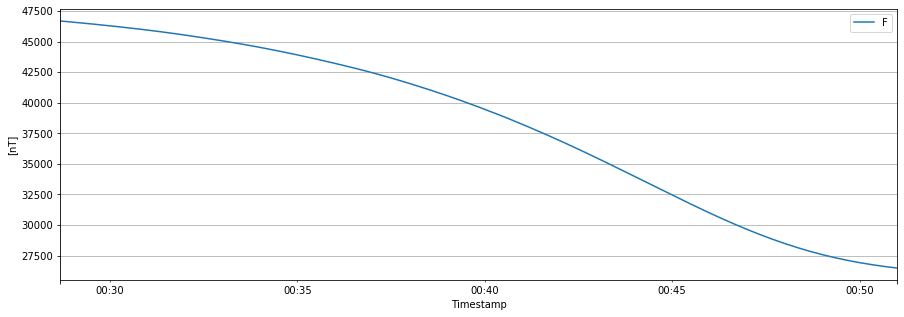

In [9]:
# Create plot
ax = df.plot(
    y=["F"],
    figsize=(15,5),
    grid=True
)
ax.set_xlabel("Timestamp")
ax.set_ylabel("[nT]");